### Machine learning for Systems & Control 5SC28 2023-2024

# Exercise Set for Lecture 2: ANN with Python

In this tutorial, we'll cover the fundamentals of deep learning in Python using PyTorch.

1. <a href="#Exercise-1:-Manual-Implementation-Neural-of-a-Network">Exercise 1: Manual Implementation of a Neural Network</a>
2. <a href="#Exercise-2:-Autograd/Backpropagation">Exercise 2: Autograd/Backpropagation</a>
3. <a href="#(Demo)-Exercise-3:-Implementing-a-simple-Neural-Network-in-Pytorch">(Demo) Exercise 3: Implementing a simple Neural Network in Pytorch</a>
4. <a href="#Exercise-4:-Implement-your-own-Neural-Network">Exercise 4: Implement your own Neural Network</a>
5. <a href="#(Optional)-Exercise-5:-Approximation-Properties">(Optional) Exercise 5: Approximation Properties</a>
6. <a href="#Exercise-6:-ANN-for-NARX">Exercise 6: ANN for NARX</a>

## Exercise 1: Manual Implementation of a Neural Network

### Data generation

**a)** Implement a code cell to compute the Gaussian probability density function $f(u)$ given by:

$$  y = f(u) = \frac{1}{\sigma \sqrt{2\pi} } \exp \left ({-\frac{1}{2}\left(\frac{u-\mu_u}{\sigma_u}\right)^2} \right )$$

with  `sigma_u = 1.0` and `mu_u=0`. *tip: use `np.pi`, `np.exp` and `np.sqrt`*

**b)** Apply this function to obtain `y_data` generated by the inputs `u_data` which are sampled from a uniform distribution between `-4*sigma_u` and `4*sigma_u` using 200 samples. 

*tip: use `np.random.uniform` and its associated documentation*.

**c)** plot the input on the x-axis and the output on the y axis using `plt.plot`

*tip: add `'.'` to the argument to make it a scatter plot*

In [ ]:
import numpy as np # array operations
from matplotlib import pyplot as plt # plotting

def Normal(u, sigma_u, mu_u): 
    y = # a) Fill this
    return y

sigma_u = 1
mu_u = 0
# b) Fill this
# c) Fill this


### Neural network Implementation

Implement a neural network with the given set of parameters (see w1-w3, b1-b3 below). 

**a)** Implement the sigmoid function given by:

$$
 \sigma(x) = \frac{1}{1+\exp(-x)}
$$

**b)** writea code for a neural network which has: 
  * 2 hidden layers 
  * 3 nodes in each hidden layer
  * Apply Sigmoid activations (excluding the last layer)

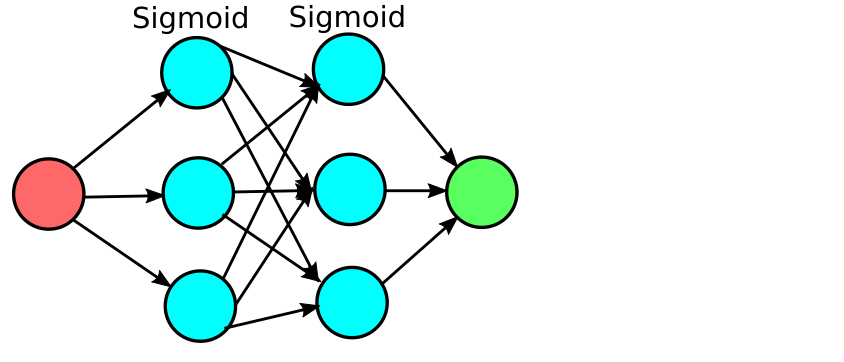

*tip: use `np.dot(w2,x1)` or `@` for matrix vector product*

In [ ]:
#You can use the same data (u_data,y_data) as Exercise 1
import numpy as np
from matplotlib import pyplot as plt
def sigmoid(x):
    # a) Fill this
plt.title('sigmoid')
x = np.linspace(-7,7,num=200)
plt.plot(x,sigmoid(x))
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.show()

u_data = np.random.uniform(-4,4,size=200) #generate the same data as Exercise 1.
y_data = np.exp(-u_data**2/2)/(np.sqrt(2*np.pi))

#Note: These are already fitted neural network parameters.
w1 = np.array([-3.20651507, -2.22372897, -2.24205213])
b1 = np.array([ 1.7777133 ,  3.01726445, -2.80330611])
w2 = np.array([[ 0.96298131,  0.97024341, -6.48872239],
               [-0.86327357, -1.96268265,  2.43754417],
               [ 1.17725663,  1.62308542, -2.42189463]])
b2 = np.array([-1.77587714,  0.8344014 , -0.97899131])
w3 = np.array([[ 0.34505691, -0.34256864,  0.23994211]])
b3 = np.array([0.12171841])
def network(u):
    #u == scalar here
    # b) Fill this
    y = # b) Fill this
    return y

plt.plot(u_data,y_data,'.')
u_test = np.linspace(-5,5)
y_data_prediced = [network(ui) for ui in u_test] #apply one by one
plt.plot(u_test,y_data_prediced)
plt.legend(['training samples','prediction'])
plt.xlabel('u'); plt.ylabel('y')
plt.show()

### Exercise 2: Autograd/Backpropagation

Deep learning relies heavily on automatic differentiation through backpropagation, a key process in optimizing neural networks. Most deep learning frameworks, including [PyTorch](https://pytorch.org/), are equipped with automatic differentiation engines.

PyTorch is particularly popular for medium-sized problems due to its ease of use and efficiency. For small problems that can be handled on a CPU, sklearn might be sufficient, while for larger problems requiring extensive distributed optimization, frameworks like Caffe and TensorFlow are commonly used. For exceptionally complex computations, JAX is often favored.

When working with PyTorch, it's important to understand how backpropagation is implemented. Let's consider an example:

Given the function 
$$ y = 2 x^2 + x + 1$$

we want to find the derivative of $y$ with respect to $x$ at $x=1$ which is 

$$ \left . \frac{dy}{dx} \right |_{x=1} = \left . (4 x + 1) \right |_{x=1} =5$$

Here `y.backward()` will propagate the gradient backwards to all `Variables` and put the gradient in the `.grad` attribute. Note that `x.data` holds the data of x.

In [ ]:
import torch #import the deep learning framework torch which has automatic differentiation

x = torch.tensor(1.,requires_grad=True) # an input variable of the function with the value of 1.

y = 2*x**2+x+1 #any function you want which uses torch methods, such as torch.sin, torch.exp, torch.sigmoid
y.backward() #This will propagate the gradient backwards to .grad attribute of all requires_grad variables: x.grad = dy/dx
print('after 1 backward: y=',y.data,', dy/dx=',x.grad,', dy/dx by hand',(4*x+1).data)

**Important note:** When using PyTorch and calling the `.backward()` method multiple times, the gradient buffer accumulates gradients. This can lead to errors if not handled properly. Refer to the official documentation for more details: https://pytorch.org/tutorials/recipes/recipes/zeroing_out_gradients.html. 

To avoid issues with accumulated gradients, it's essential to reset the gradient buffer to zero before each backward pass. You can achieve this by calling the `zero_()` method.

In [ ]:
import torch #import the deep learning framework torch which has automatic differentiation

x = torch.tensor(1.,requires_grad=True)
                                                                 
y = 2*x**2+x+1 
y.backward(retain_graph=True) #retain_graph=True otherwise backwards can only be called ones (buffers are cleared)
print('after 1 backward: y=',y.data,', dy/dx=',x.grad,', dy/dx by hand',(4*x+1).data)

y.backward(retain_graph=True) #call backwards again which adds the gradient to the x.grad again which could be undesirable
print('after 2 backward: y=',y.data,', dy/dx=',x.grad,', dy/dx by hand',(4*x+1).data)

####### important ######
x.grad.data.zero_() #manually set the gradient data to zero which resets the buffer
##########################

y.backward(retain_graph=True) #This will propagate the gradient backwards 
print('after 3 with zero_ call backward: y=',y.data,', dy/dx=',x.grad,', dy/dx by hand',(4*x+1).data)



**a)**  We'll showcase the capabilities of the autograd module by implementing the [Newton root finding algorithm](https://en.wikipedia.org/wiki/Newton%27s_method). Your task is to calculate the value of $\pi$ by finding the root of $$\sin(x)=0$$ starting at 
$x_0=2.5$, using Newton's method.

*tip: the Newton method is given by*
$$ x_{i+1} = x_{i} + \delta x_{i}$$
$$ f(x_{i}+\delta x_{i}) \approx f(x_{i}) + f'(x_{i}) \delta x_{i} = 0$$
$$ \delta x_{i} = -\frac{f(x_i)}{f'(x_i)}$$
*tips: use `torch.sin` and the value of a tensor can be changed by modifying `.data` attribute (e.g. `x.data = 1`)*

In [ ]:
import torch #import the deep learning framework torch which has automatic differentiation
x0 = 2.5
x = torch.tensor(x0,dtype=torch.float64,requires_grad=True)
print(f'iteration: {0}, pi={np.pi}, x={x.data.item()}, difference = {x.data.item() - np.pi}')
for i in range(1,10):

    # a) Fill this
    x.grad.data.zero_() #this will set the gradient zero before next step
    print(f'iteration: {i}, pi={np.pi}, x={x.data.item()}, difference = {x.data.item() - np.pi}')
    

**b)** Write a non-linear fitting optimizer using steepest decent for the following function: 

$$ f_0(x) = a_0 (1-exp(-x/b_0)) + c_0 + \varepsilon$$

where $ a_0 = 5, b_0 = 2.25, c_0 = -2$, and $\varepsilon \sim N(0,0.1)$

You'll start the optimization process from $a=4$, $b=2$ and $c=1$. 

Remember that steepest decent is given by:

$$ a^{+} = a - \alpha \frac{dL}{da}$$

with $L$ the mean square loss: 

$$L = \frac{1}{N} \sum_{i=1}^N (y_i-\hat y_i)^2$$

*tip: use `torch.mean` to calculate a mean*

*tip: don’t forget to reset the gradients to zero*

In [ ]:
import torch
#data generation
x_data = torch.linspace(2,10,steps=100)
a0, b0, c0 = 5, 2.25, -2
y_data = (a0*(1-torch.exp(-x_data/b0))+c0 + torch.randn(100)/10).detach()
plt.plot(x_data,y_data,'.')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

#Variable creation, initially a=4, b=2, c=1
a = torch.tensor(4.,requires_grad=True)
b = torch.tensor(2.,requires_grad=True)
c = torch.tensor(1.,requires_grad=True)
alpha = 5e-2 #the learning rate

for epoch in range(20000):

    #cal Loss and gradient
    # b) Fill this
    Loss = # b) Fill this
    #apply gradient
    # b) Fill this
    #zero grad
    # b) Fill this
    if epoch%500==0: 
        print(f'epoch={epoch}, Loss={Loss.item()}') # enable this for a monitor while optimizing

    
with torch.no_grad(): # Using `with torch.no_grad(): ensures that gradients will not be calculated. 
                      #This makes plotting and result analysis much simpler
    plt.plot(x_data,y_data,'.')
    plt.plot(x_data,a*(1-torch.exp(-x_data/b))+c,'.')
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()
    print('a0=',a0,'a fitted =',a.item())
    print('b0=',b0,'b fitted =',b.item())
    print('c0=',c0,'c fitted =',c.item())

Alternatively, one can use the optimizers that are already included in PyTorch. For instance, you can find the implementation for the previous problem using the `torch.optim.SGD` optimizer below. 

*note: using `torch.optim.SGD` when using the whole batch is equivalent to using Gradient Decent*

In [ ]:
import torch
a0,b0,c0 = 5, 2.25, -2

x_data = torch.linspace(2,10,steps=100)
y_data = (a0*(1-torch.exp(-x_data/b0))+c0 + torch.randn(100)/10).detach()
plt.plot(x_data,y_data)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

a = torch.tensor(4.,requires_grad=True)
b = torch.tensor(2.,requires_grad=True)
c = torch.tensor(1.,requires_grad=True)
optimizer = torch.optim.SGD([a,b,c],lr=5e-2)

for epoch in range(20000):
    optimizer.zero_grad() #zero the gradients

    y_predict = a*(1-torch.exp(-x_data/b))+c
    Loss = torch.mean((y_predict-y_data)**2) #calculate loss
    Loss.backward() 
    optimizer.step() #step the optimizer to update the parameter using the gradients
    if epoch%500==0: 
        print(epoch,Loss.item())
    
with torch.no_grad():
    plt.plot(x_data,y_data,'.')
    plt.plot(x_data,a*(1-torch.exp(-x_data/b))+c,'.')
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()
    print('a0=',a0,'a fitted =',a.item())
    print('b0=',b0,'b fitted =',b.item())
    print('c0=',c0,'c fitted =',c.item())

(Optional) You can read through the [Introduction to PyTorch Tensors](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)  for a deeper understanding. An important part to focus on is the section about [Converting to numpy arrays from and to tensors](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html#numpy-bridge). This part explains how to convert data between PyTorch tensors and NumPy arrays, which is crucial for interoperability between PyTorch and other libraries like NumPy.

### (Demo) Exercise 3: Implementing a simple Neural Network in Pytorch

This exercise demonstrates how to implement a basic neural network using PyTorch. Gradients are commonly used for first-order optimization of neural networks. Below is an example illustrating their usage.

#### Create/Load data:

In [ ]:
import torch

# Generate 1000 samples from a normal distribution for the input data
X_data = torch.randn((1000,),dtype=torch.float64) 
# Define the function to predict, which is a simple quadratic
Y_data = X_data**2 
# Add a bit of noise to the output data
Y_data += torch.randn((1000,),dtype=torch.float64)/10

# Plot the data
plt.plot(X_data.numpy(),Y_data.numpy(),'.')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

#### Create network and optimizer:

In [ ]:
import torch
from torch import nn

# create the structure of the neural network
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__() 
        self.lay1 = nn.Linear(1,15).double() # a linear fully connected layer from 1 features to 15 features
                                             # the activation function is defined in the forward (see below)
        self.lay2 = nn.Linear(15,1).double() # a linear fully connected layer from 15 features to 1 features
    
    def forward(self,u): # is called when model(anything) is called
        # u has input shape (N,)
        u = u[:,None] #convert u from shape (N,) to (N,1)
        x1 = torch.sigmoid(self.lay1(u)) #apply the input to the first layer and apply a sigmoid
        y = self.lay2(x1)[:,0] #pass through second layer which results in a shape (N,1) and convert it back to (N,)
        return y

model = Network() #create the network instance
print(model)
parameters = list(model.parameters()) #automatically generates a list of the model parameters
print(parameters) 
optimizer = torch.optim.SGD(parameters,lr=0.1)

#### Optimize

In [ ]:
def CallLoss(X,Y):    
    return torch.mean((model(X)-Y)**2)

for epoch in range(20000):
    Loss = CallLoss(X_data,Y_data)
    optimizer.zero_grad() #set the gradient buffers to zero, this is essential.
    Loss.backward()
    optimizer.step()
    if epoch%500==0: print(f'epoch={epoch} Loss={Loss}')

#### Plotting Results:

In [ ]:
with torch.no_grad(): #such that gradients cannot be calculated and conversion to normal arrays is simpler.
    X_test = torch.linspace(-3,3,steps=1000,dtype=torch.float64)
    plt.plot(X_data,Y_data,'.',label='training set')
    plt.plot(X_test,model(X_test),label='predicted')
    plt.plot(X_test,X_test**2,label='real')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    plt.title('residual plot')
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.plot(X_data,Y_data-model(X_data),'.')
    plt.show()
    

** Note on PyTorch Data Types:

PyTorch does not automatically convert between double (float64) and single (float32) data types. When using  `torch.as_tensor` to convert from a numpy array, it's advisable to explicitly specify the data type as float32 to avoid errors.


### Exercise 4: Implement your own Neural Network

Now create your own Neural Network using PyTorch. 

 **a)** Create a network with 
  * 2 hidden layers 
  * 3 nodes (i.e neurons) per layer 
  * Apply sigmoid activation functions. (excluding the last layer)

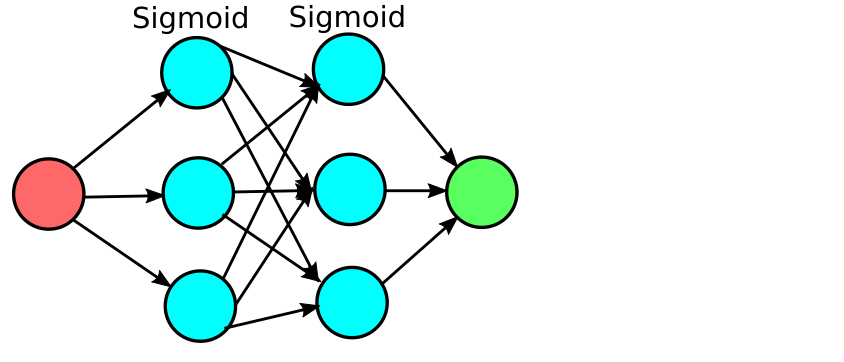

In [ ]:
import torch
from torch import nn

# Define the neural network structure
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.lay1 = nn.Linear(1, 3).double()  # Define a linear layer from 1 input feature to 3 output features
        self.lay2 = nn.Linear(3, 3).double()  # Define a linear layer from 3 input features to 3 output features
        self.lay3 = nn.Linear(3, 1).double()  # Define a linear layer from 3 input features to 1 output feature
    
    def forward(self, u):
        u = u[:, None]  # Convert u from shape (N,) to (N,1)
        x1 = torch.sigmoid(self.lay1(u))  # Apply the input to the first layer and apply a sigmoid activation
        x2 = torch.sigmoid(self.lay2(x1))  # Apply the input to the second layer and apply a sigmoid activation
        y = self.lay3(x2)[:, 0]  # Pass through the third layer and convert back to shape (N,)
        return y


**b)** Optimize the model by using the mean square error and SGD. Furthermore, try changing the learning rate `lr` to make the optimization process more efficient.

In [ ]:
#data generation
u_data = np.random.uniform(-4,4,size=200)
y_data = np.exp(-u_data**2/2)/(np.sqrt(2*np.pi))

# convert numpy arrays to tensors such that it can be used by PyTorch
u_data, y_data = torch.tensor(u_data), torch.tensor(y_data) 


# b) Fill this


**c)** Plot the results overlaying the data and a residual plot.

*tip: use torch.no_grad()*

In [ ]:
# c) Fill this


### (Optional) Exercise 5: Approximation Properties

As seen in the lectures the approximation properties of neural networks scale well with the dimentionallity of the problem. i.e. the loss function scales with

$$
 V_{\text{ANN}} = O \left (\frac{1}{n} \right )\\
$$

where $n$ denotes the number of hidden neurons. Whereas basis function expansion (e.g. multivariate polynomials) with $n$ terms scales with
$$
 V_{\text{poly}} = O \left (\frac{1}{n^{2/n_u}} \right )
$$
where $n_u$ denotes the number of input variables. This exercise will illustrate this difference as an example.


Let us consider an example where we try to fit 

$$
y(u) = \sum_i \text{bool} (|u_i|<0.5)
$$
Where

$$
\text{bool}(\text{True}) = 1\\
\text{bool}(\text{False}) = 0
$$


where $u$ has 8 dimentions and is sampled from $U(-1.0, 1.0)$.

**a)** Run the data generation and polynomial fit cells and observe the results.

#### Data generation

In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

def get_data(Ndata):
    nu = 8 # number of inputs, can be modified
    gen_x = lambda: np.random.uniform(-1,1,size=(Ndata,nu))
    #You can also try these functions:
    #f = lambda x: np.sin(x[:,0]*x[:,1] + .5*x[:,2] + .5*x[:,1])*np.exp(-x[:,3]**2)
    #f = lambda x: 3*np.sin(-np.sum(x**2,axis=1)+0.5)
    
    #the main function:
    f = lambda x: np.sum(np.abs(x)<0.5,axis=1)
    Xtrain, Xtest = gen_x(), gen_x()
    Ytrain, Ytest = f(Xtrain), f(Xtest)
    m = np.mean([Ytrain,Ytest])
    s = np.std([Ytrain,Ytest])
    Ytrain = (Ytrain-m)/s # normalization 
    Ytest = (Ytest-m)/s
    return Xtrain, Ytrain, Xtest, Ytest

Xtrain, Ytrain, Xtest, Ytest = get_data(Ndata=2*10**4)
plt.hist(Ytrain,bins=200,density=True)
plt.ylabel('Density')
plt.xlabel('y')
plt.show()



#### Polynomial fitting

Run cell below, no modification required.

In [ ]:
def get_pol(Xtrain, Ytrain, Xtest, Ytest, degree):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                     ('linear', LinearRegression())])
    model.fit(Xtrain,Ytrain)
    Ytest_p = model.predict(Xtest)
    NRMStest = np.mean((Ytest-Ytest_p)**2)**0.5/np.std(Ytest)
    
    return NRMStest, len(model['linear'].coef_.flat), model

Npar_pol = []
NRMS_pol = []
Npar_old = 1
for degree in range(1,100): 
    print(degree)
    NRMStest, Nparameters, model = get_pol(Xtrain, Ytrain, Xtest, Ytest, degree)
    print(NRMStest, Nparameters)
    Npar_pol.append(Nparameters)
    NRMS_pol.append(NRMStest)
    if Nparameters**2/Npar_old>5e3: #stop when number of next parameter will be over 3*10^3
        break
    Npar_old = Nparameters
    
plt.loglog(Npar_pol,NRMS_pol)
plt.xlabel('Number of parameters')
plt.ylabel('NRMS test')
plt.show()

#### Construct ANN

**b)** Construct a sigmoid ANN with 1 hidden layer where the number of hidden nodes is a parameter of `__init__` (called when `Network(...)` is used) and finish the `get_ANN` function which fits the model for a given a number of epochs.

*tip: convert the `Xtrain,Ytrain, Xtest, Ytest` NumPy arrays to torch arrays using `as_tensor`*

In [ ]:
from torch import nn
import torch
class Network(nn.Module): 
    def __init__(self, n_in, n_hidden_nodes): 
        super(Network,self).__init__() 
        # b) Fill this
    def forward(self,u): 
        # u.shape == (N,10)
        # b) Fill this
def get_ANN(Xtrain,Ytrain, Xtest, Ytest, n_hidden_nodes, epochs=10000):
    model = Network(Xtrain.shape[1],n_hidden_nodes) #create the network
    
    optimizer = # b) Fill this
    # b) Fill this
    for epoch in range(epochs): 
        Loss = # b) Fill this
        # b) Fill this
        if epoch%1000==0: 
            print(epoch,Loss.item()**0.5)
    
    with torch.no_grad(): #analysis results
        Ytest_p = model(Xtest)
        NRMStest = np.mean((Ytest.numpy()-Ytest_p.numpy())**2)**0.5/np.std(Ytest.numpy())
    
    Nparameters = np.sum([np.prod(p.data.shape) for p in list(model.parameters())]) #calculate the number of parameters
    return NRMStest, Nparameters, model

Npar_ANN = []
NRMS_ANN = []
for n_nodes,epochs in [(2,20000),(8,20000),(32,20000),(128,40000)]: #runing this section will take some time
    print(n_nodes)
    NRMStest, Nparameters, model = get_ANN(Xtrain,Ytrain, Xtest, Ytest, n_nodes, epochs=epochs)
    print(NRMStest, Nparameters)
    Npar_ANN.append(Nparameters)
    NRMS_ANN.append(NRMStest)

#### Plot Results

In [ ]:
plt.loglog(Npar_pol,NRMS_pol,'--.')
plt.loglog(Npar_ANN,NRMS_ANN,'--.')
# plt.loglog([Nparameters],0.001,'o')
plt.xlabel('Number of parameters')
plt.ylabel('NRMS test')
plt.legend(['polynomial','ANN'])
plt.show()


**c)** Does this result differ from what we would expect from the theorem?

**Answer c):** fill by student


## Exercise 6: ANN for NARX


Let's implement an ANN for the NARX model that was introduced in the previous exercise set.

#### Data Generation

**Run cell** below to generate the data, (no modification required)

The data is generated and split into NumPy arrays `Xtrain, Xval, Ytrain, Yval`.

where just as before each row of `Xtrain` is given by $[u_{k-nb}, u_{k-nb+1}, ..., u_{k-1}, y_{k-na}, y_{k-na+1}, ... y_{k-1}]$ and each corresponding element of `Ytrain` is $y_{k}$. 

We generate 5000 training samples which is considerably more than last exercise set.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def f(upast,ypast):
    ukm2, ukm1 = upast
    ykm2, ykm1 = ypast
    ystar = (0.8 - 0.5 * np.exp(-ykm1 ** 2)) * ykm1 - (0.3 + 0.9 * np.exp(-ykm1 ** 2)) * ykm2 \
           + ukm1 + 0.2 * ukm2 + 0.1 * ukm1 * ukm2 
    return ystar + np.random.normal(scale=0.01)

def get_NARX_data(ulist, f, na, nb):
    #init upast and ypast as lists.
    upast = [0.]*nb 
    ypast = [0.]*na 
    
    ylist = []
    for unow in ulist:
        #compute the current y given by f
        ynow = f(upast,ypast) 
        
        #update past arrays
        upast.append(unow)
        upast.pop(0)
        ypast.append(ynow)
        ypast.pop(0)
        
        #save result
        ylist.append(ynow)
    return np.array(ylist) #return result

##########
na, nb = 2, 2
##########

np.random.seed(42)
N = 5000 #more data than previouse exercise
ulist = np.random.normal(scale=1,size=N)
ylist = get_NARX_data(ulist,f,na,nb)

def make_training_data(ulist,ylist,na,nb):
    #Xdata = (Nsamples,Nfeatures)
    #Ydata = (Nsamples)
    Xdata = []
    Ydata = []
    #for loop over the data:
    for k in range(max(na,nb),len(ulist)): #note:skip the first few indexes
        Xdata.append(np.concatenate([ulist[k-nb:k],ylist[k-na:k]])) 
        Ydata.append(ylist[k]) 
    return np.array(Xdata), np.array(Ydata)

Xdata, Ydata = make_training_data(ulist, ylist, 2, 2)

from sklearn.model_selection import train_test_split 
Xtrain, Xval, Ytrain, Yval = train_test_split(Xdata, Ydata) 

#### Neural Network Construction and Training

**a)** Construct a 1 hidden layer neural network with 32 hidden nodes and sigmoid activation and train it using an optimizer (e.g. SGD, adam) on the training data for 50000 epochs. 

*tip: convert the NumPy arrays into torch arrays using `torch.as_tensor` or similar*

In [ ]:
from torch import nn
import torch
# a) Fill this
model = # a) Fill this


#### Prediction Error

**b)** Visualize the prediction error on both the training set and the validation set by making residual plots. Also, calculate the NRMS prediction error on the validation set. 

*tip: use a_torch_array.numpy() to convert an torch array to a numpy array*

In [ ]:
#residual calculations and plotting
with torch.no_grad():
    # b) Fill this


#### Simulation Error

**c)** Observe how the `model` is used in simulation in the cell below and plot the results of this simulation in a residual plot and print the NRMS error. 

In [ ]:

np.random.seed(43)
utest = np.random.normal(scale=1.0,size=20000) #create test data
ytest = get_NARX_data(utest,f,na,nb)


def fmodel(upast,ypast):
    x = np.concatenate([upast,ypast]) #concat to Xtrain format
    xten = torch.as_tensor(x)[None,:] #convert to tensor to one with shape (1,na+nb)
    with torch.no_grad():
        ypred = model(xten)[0] #pass through network and take the first sample
    return ypred.numpy() #convert it back into a number
ytest_sim = get_NARX_data(utest, fmodel, na, nb) #apply utest to fmodel

# c) Fill this
